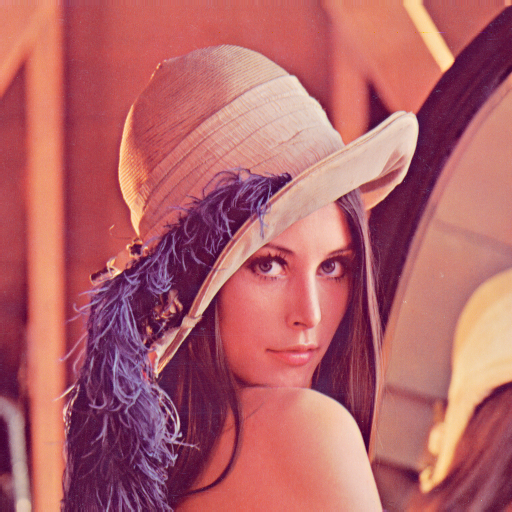

Original Image Displayed
Image Size: Height=512, Width=512, Channels=3
Total Pixels: 262144


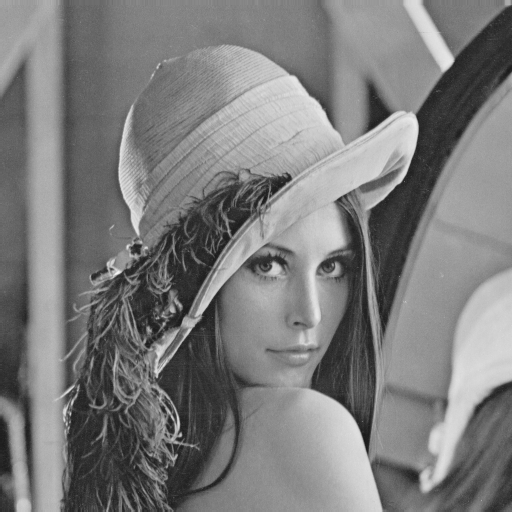

Grayscale Image Displayed and Saved as gray_image.jpg


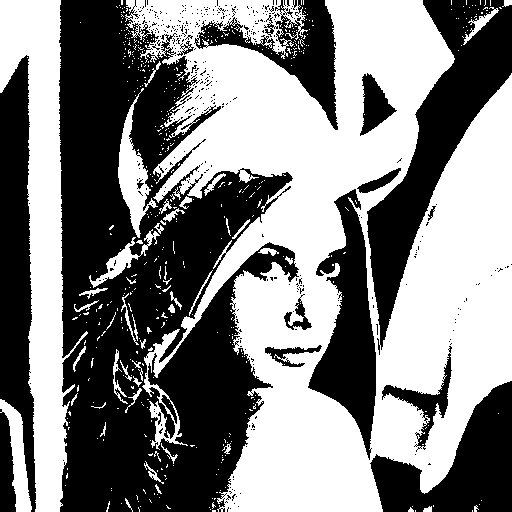

Binary Image Displayed and Saved as binary_image.jpg
Number of Black Pixels: 128178
Image Size: (512, 512)


In [2]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 1. Read the image
try:
  image = cv2.imread('Lena_Image.png') # Replace 'input.jpg' with your image path

  if image is None:
      print("Error: Could not open or read the image.")
  else:
      # 2. Display the image
      cv2_imshow(image)
      print("Original Image Displayed")

      # 3. Extract image size
      height, width, channels = image.shape
      print(f"Image Size: Height={height}, Width={width}, Channels={channels}")

      # 4. Calculate image pixels
      total_pixels = height * width
      print(f"Total Pixels: {total_pixels}")

      # 5. Convert RGB to Grayscale
      gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      cv2.imwrite('/content/gray_image.jpg', gray_image)
      cv2_imshow(gray_image)
      print("Grayscale Image Displayed and Saved as gray_image.jpg")

      # 6. Convert RGB to Grayscale and Binary
      _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY) # Adjust threshold as needed
      cv2.imwrite('/content/binary_image.jpg', binary_image)
      cv2_imshow(binary_image)
      print("Binary Image Displayed and Saved as binary_image.jpg")


      # Count black pixels
      black_pixels = np.sum(binary_image == 0)  # Count pixels with value 0 (black)
      print(f"Number of Black Pixels: {black_pixels}")
      print(f"Image Size: {binary_image.shape}")
except Exception as e:
  print(f"An error occurred: {e}")

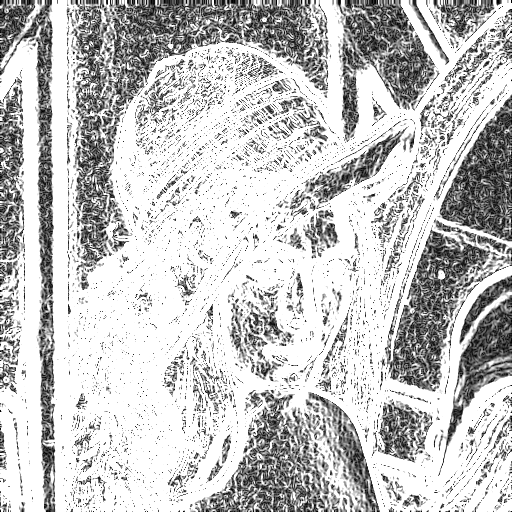

Sobel Edge Detection


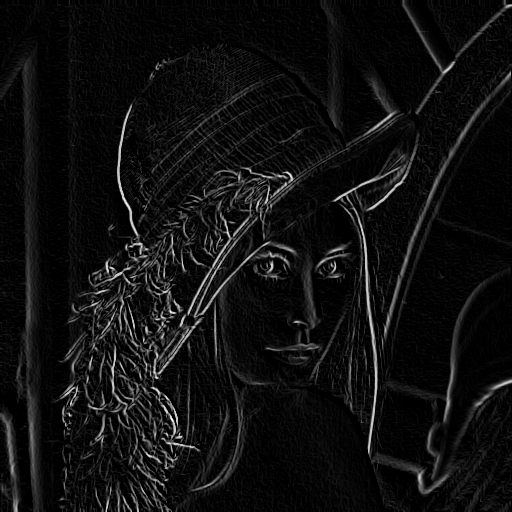

Prewitt Edge Detection


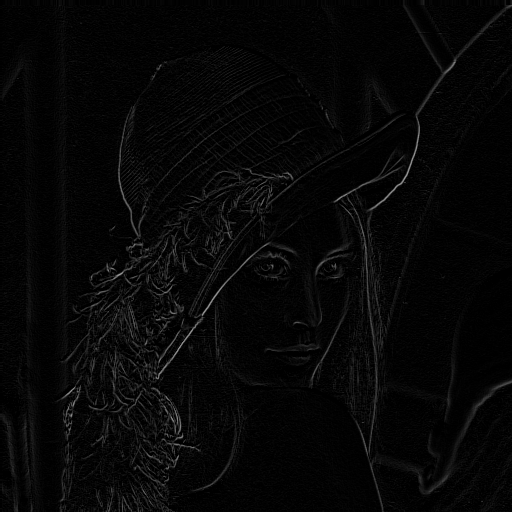

Roberts Cross Edge Detection


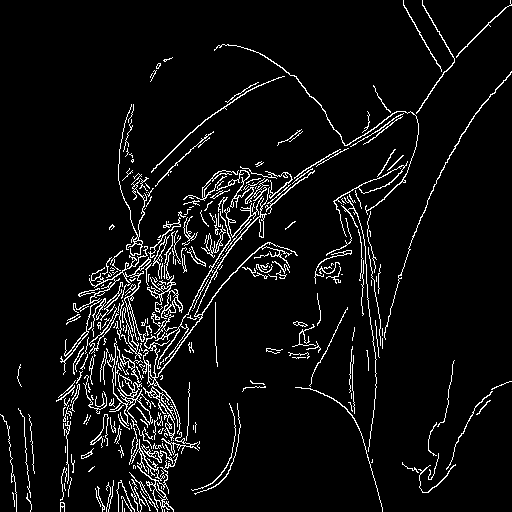

Canny Edge Detection


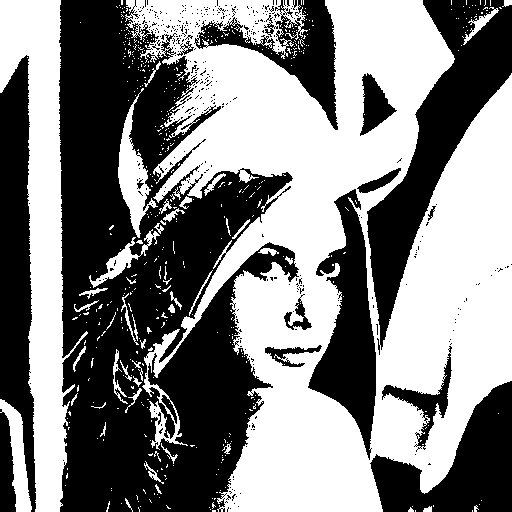

Global Thresholding


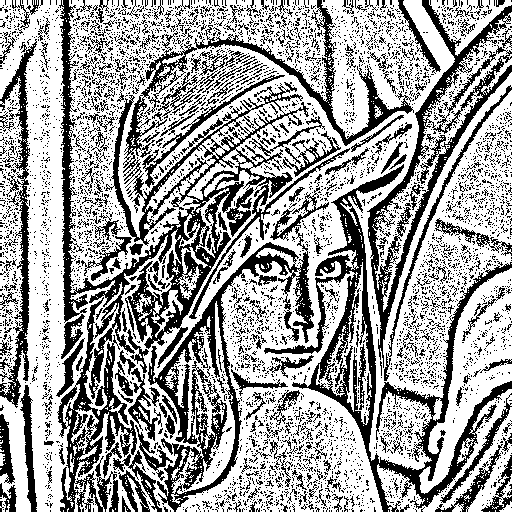

Adaptive Thresholding


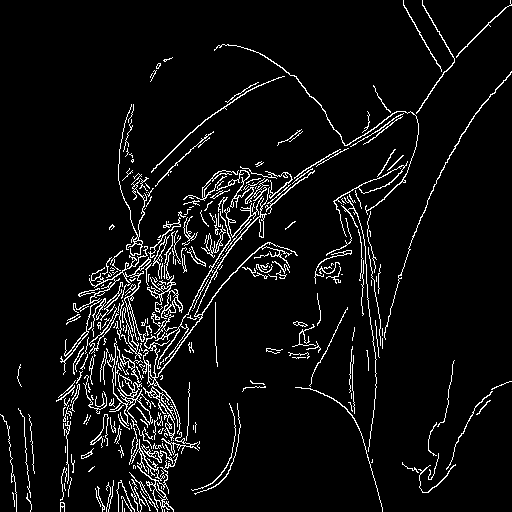

Edge Detection for Segmentation (Canny)


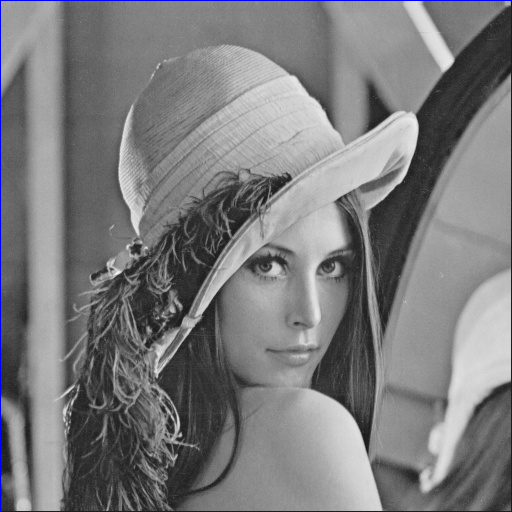

Region-Based Segmentation (Watershed)


In [10]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

try:
  image = cv2.imread('gray_image.jpg')
  if image is None:
      print("Error: Could not open or read the image.")
  else:
      # ... (Existing code)

      # 1. Edge Detection

      # i. Sobel Operator
      sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
      sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
      sobel_combined = cv2.magnitude(sobelx, sobely)
      cv2_imshow(sobel_combined)
      print("Sobel Edge Detection")

      # ii. Prewitt Operator
      kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
      kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
      prewittx = cv2.filter2D(gray_image, -1, kernelx)
      prewitty = cv2.filter2D(gray_image, -1, kernely)
      prewitt_combined = np.hypot(prewittx, prewitty)  # Using np.hypot for magnitude
      prewitt_combined = prewitt_combined / prewitt_combined.max() * 255  # Normalize to 0-255
      prewitt_combined = prewitt_combined.astype(np.uint8)  # Convert to uint8 for display
      cv2_imshow(prewitt_combined)
      print("Prewitt Edge Detection")


      # iii. Roberts Cross Operator
      roberts_cross_v = np.array([ [1, 0 ],[0,-1]])
      roberts_cross_h = np.array([ [ 0, 1],[-1, 0]])
      vertical = cv2.filter2D(gray_image, -1, roberts_cross_v)
      horizontal = cv2.filter2D(gray_image, -1, roberts_cross_h)
      roberts = np.hypot(vertical,horizontal)
      cv2_imshow(roberts)
      print("Roberts Cross Edge Detection")

      # iv. Canny Edge Detector
      edges = cv2.Canny(gray_image, 100, 200) # Adjust thresholds as needed
      cv2_imshow(edges)
      print("Canny Edge Detection")

      # 2. Image Segmentation

      # i. Global Thresholding
      ret, thresh1 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
      cv2_imshow(thresh1)
      print("Global Thresholding")

      # ii. Adaptive Thresholding
      thresh2 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
      cv2_imshow(thresh2)
      print("Adaptive Thresholding")

      # iii. Edge Detection for Segmentation (using Canny from above)
      cv2_imshow(edges)
      print("Edge Detection for Segmentation (Canny)")

      # iv. Region-Based Segmentation (Watershed)
      ret, markers = cv2.connectedComponents(edges)
      markers = markers+1
      markers[edges==255] = 0
      markers = cv2.watershed(image,markers)
      image[markers == -1] = [255,0,0]
      cv2_imshow(image)
      print("Region-Based Segmentation (Watershed)")

except Exception as e:
  print(f"An error occurred: {e}")